In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

# path to the binary train file with image data
TEST_DATA_PATH = './data/stl10_binary/test_X.bin'

# path to the binary train file with labels
TEST_LABEL_PATH = './data/stl10_binary/test_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels , typ):
    print("Saving images to disk")
    lbl = [ "airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey" , "ship", "truck" ] 
    i = 0
    for image in images:
        label = lbl[ labels[i]-1 ]
        if i>=3000 and typ == "val":
          typ = "test"
        directory = './img/'+ str(typ) +"/"+ str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1


sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)


In [0]:
# download data if needed
download_and_extract()

# test to check if the whole dataset is read correctly
images = read_all_images(DATA_PATH)
print(images.shape)

labels = read_labels(LABEL_PATH)
print(labels.shape)

# save images to disk
save_images(images, labels , "train")

# test to check if the whole dataset is read correctly
images = read_all_images(TEST_DATA_PATH)
print(images.shape)

labels = read_labels(TEST_LABEL_PATH)
print(labels.shape)

# save images to disk
save_images(images, labels , "val")


(5000,)
Saving images to disk
./img/train/bird/0
./img/train/dog/1
./img/train/bird/2
./img/train/horse/3
./img/train/cat/4
./img/train/truck/5
./img/train/monkey/6
./img/train/deer/7
./img/train/dog/8
./img/train/ship/9
./img/train/airplane/10
./img/train/horse/11
./img/train/airplane/12
./img/train/ship/13
./img/train/monkey/14
./img/train/horse/15
./img/train/deer/16
./img/train/horse/17
./img/train/car/18
./img/train/car/19
./img/train/bird/20
./img/train/bird/21
./img/train/horse/22
./img/train/car/23
./img/train/bird/24
./img/train/ship/25
./img/train/dog/26
./img/train/bird/27
./img/train/dog/28
./img/train/dog/29
./img/train/airplane/30
./img/train/airplane/31
./img/train/airplane/32
./img/train/bird/33
./img/train/cat/34
./img/train/horse/35
./img/train/monkey/36
./img/train/car/37
./img/train/bird/38
./img/train/cat/39
./img/train/bird/40
./img/train/horse/41
./img/train/bird/42
./img/train/cat/43
./img/train/monkey/44
./img/train/deer/45
./img/train/cat/46
./img/train/airpla

In [0]:
!wget https://raw.githubusercontent.com/Ujjwal-9/Knowledge-Distillation/master/xception.py

--2019-02-26 04:14:35--  https://raw.githubusercontent.com/Ujjwal-9/Knowledge-Distillation/master/xception.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5732 (5.6K) [text/plain]
Saving to: ‘xception.py.1’

xception.py.1       100%[===================>]   5.60K  --.-KB/s    in 0s      

2019-02-26 04:14:36 (89.8 MB/s) - ‘xception.py.1’ saved [5732/5732]



In [0]:
import numpy as np

import keras
from keras import optimizers
from keras.losses import categorical_crossentropy as logloss
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

import matplotlib.pyplot as plt
%matplotlib inline

from xception import Xception, preprocess_input

In [0]:
data_dir = 'img/'

In [0]:
data_generator = ImageDataGenerator(
    rotation_range=30, 
    zoom_range=0.3,
    horizontal_flip=True, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.001,
    channel_shift_range=0.1,
    fill_mode='reflect',
    data_format='channels_last',
    preprocessing_function=preprocess_input
)

data_generator_val = ImageDataGenerator(
    data_format='channels_last',
    preprocessing_function=preprocess_input
)

train_generator = data_generator.flow_from_directory(
    data_dir + 'train', 
    target_size=(299, 299),
    batch_size=64
)

val_generator = data_generator_val.flow_from_directory(
    data_dir + 'val', shuffle=False,
    target_size=(299, 299),
    batch_size=64
)

test_generator = data_generator_val.flow_from_directory(
    data_dir + 'test', shuffle=False,
    target_size=(299, 299),
    batch_size=1
)

Found 5000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


In [0]:
model = Xception(weight_decay=1e-5 , classes=10)
model.count_params()

20881970

In [0]:
# add entropy to the usual logloss (it is for regularization),
# "Regularizing Neural Networks by Penalizing Confident Output Distributions",
# https://arxiv.org/abs/1701.06548
# it reduces overfitting a little bit
def loss(y_true, y_pred):
    entropy = -K.mean(K.sum(y_pred*K.log(y_pred), 1))
    beta = 0.1
    return logloss(y_true, y_pred) - beta*entropy

In [0]:
model.compile(
    optimizer=optimizers.SGD(lr=1e-2, momentum=0.9, nesterov=True), 
    loss=loss, metrics=['categorical_crossentropy', 'accuracy', 'top_k_categorical_accuracy']
)

In [0]:
model.fit_generator(
    train_generator, 
    steps_per_epoch=266, epochs=30, verbose=1,
    callbacks=[
        ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=2, epsilon=0.007),
        EarlyStopping(monitor='val_acc', patience=4, min_delta=0.01)
    ],
    validation_data=val_generator, validation_steps=80, workers=4
)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Epoch 1/30
266/266 [==============================] - 494s 2s/step - loss: 0.5146 - categorical_crossentropy: 0.5575 - acc: 0.8444 - top_k_categorical_accuracy: 0.9775 - val_loss: 0.1264 - val_categorical_crossentropy: 0.1035 - val_acc: 0.9726 - val_top_k_categorical_accuracy: 0.9994
Epoch 2/30
266/266 [==============================] - 467s 2s/step - loss: 0.2864 - categorical_crossentropy: 0.2861 - acc: 0.9104 - top_k_categorical_accuracy: 0.9961 - val_loss: 0.1113 - val_categorical_crossentropy: 0.0800 - val_acc: 0.9767 - val_top_k_categorical_accuracy: 0.9992
Epoch 3/30
266/266 [==============================] - 460s 2s/step - loss: 0.2744 - categorical_crossentropy: 0.2687 - acc: 0.9137 - top_k_categorical_accuracy: 0.9967 - val_loss: 0.1066 - val_categorical_crossentropy: 0.0746 - val_acc: 0.9777 - val_top_k_categorical_accuracy: 0.9998
Epoch 4/30
266/266 [==============================] - 460s 2s/step - loss: 0.2475 - categorical_crossentropy: 0.2395 - acc: 0.9222 - top_k_catego

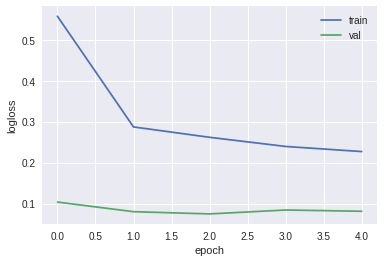

In [0]:
plt.plot(model.history.history['categorical_crossentropy'], label='train');
plt.plot(model.history.history['val_categorical_crossentropy'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('logloss');
plt.savefig('xception_loss.jpg')

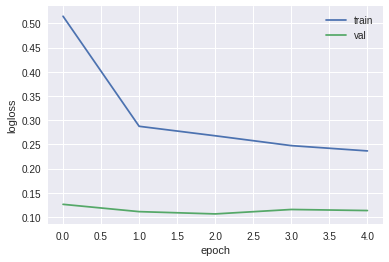

In [0]:
plt.plot(model.history.history['loss'], label='train');
plt.plot(model.history.history['val_loss'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('logloss');
plt.savefig('xception_loss.jpg')

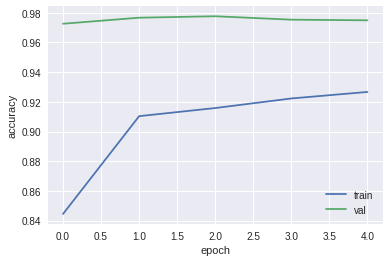

In [0]:
plt.plot(model.history.history['acc'], label='train');
plt.plot(model.history.history['val_acc'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('accuracy');
plt.savefig('xception_acc.jpg')

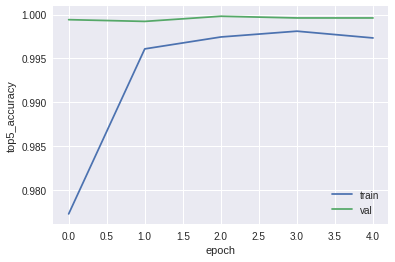

In [0]:
plt.plot(model.history.history['top_k_categorical_accuracy'], label='train');
plt.plot(model.history.history['val_top_k_categorical_accuracy'], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('top5_accuracy');
plt.savefig('xception_top5_acc.jpg')

In [0]:
model.evaluate_generator(val_generator, 80)

[0.11129716963603578,
 0.07846228605527489,
 0.9757053295273018,
 0.9996081504702194]

[0.11245624613612423,
 0.08030447026358503,
 0.9760971790570824,
 0.9996081504702194]

In [0]:
model.evaluate_generator(test_generator, 80)

[0.062053831201046704, 0.02552941267443245, 0.9875, 1.0]

In [0]:
model.save('xception.h5')

In [0]:
#from keras.models import Model,load_model
#model = Xception(classes=10)
#model.load_weights('xception.h5')

In [0]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1,steps=STEP_SIZE_TEST)

5000/5000 [==============================] - 178s 36ms/step


In [0]:
predicted_class_indices=np.argmax(pred,axis=1)
len(predicted_class_indices)

5000

In [0]:
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
#lbl = [ "airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey" , "ship", "truck" ]  
predictions = [labels[k] for k in predicted_class_indices]
labels
len(predictions)

5000

In [0]:
import pandas as pd 
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("xception_results.csv",index=False)

In [0]:
!cp "xception.h5" "/content/gdrive/My Drive/Colab Notebooks/classification/xception_kd/xception.h5"
!cp "xception_results.csv" "/content/gdrive/My Drive/Colab Notebooks/classification/xception_kd/xception_results.csv"
!cp "xception_acc.jpg" "/content/gdrive/My Drive/Colab Notebooks/classification/xception_kd/xception_acc.jpg"
!cp "xception_loss.jpg" "/content/gdrive/My Drive/Colab Notebooks/classification/xception_kd/xception_loss.jpg"
!cp "xception_top5_acc.jpg" "/content/gdrive/My Drive/Colab Notebooks/classification/xception_kd/xception_top5_acc.jpg"